# This is the main notebook file for the machine learning program

In [1]:
# Imports
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn import datasets, linear_model
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
%run read_csv_files.ipynb

2023-02-15 15:21:11.208560: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Scaled data where the target value predicts whether the home team will win the baksetball game (Signal = '1')

## Part 1: Neural Network with Deep Learning
### 10 seasons of data from 2011 to 2021
### Three hidden layers with LeakyReLU activation and maximum nodes, one outer layer with linear activation, MSE as the loss activation, and a maximum of 80 epochs

In [2]:
# Read in the 2011-2021 dataframe from the `read_csv_files.ipynb` file
# Drop the 'Date' column from the dataframe
ten_seasons_nn = df_combined_2011_2021.drop(
    columns=['Date']
)

# Display the dataframe
ten_seasons_nn

,Home_Team,Away_Team,Over_Under,Spread,Moneyline_Home_Team,Moneyline_Away_Team,Game_Total_Points,Win_Margin
0,New York Knicks,Boston Celtics,195.5,5.0,-210.0,185.0,210.0,2.0
1,Dallas Mavericks,Miami Heat,190.5,3.5,185.0,-210.0,199.0,-11.0
2,Los Angeles Lakers,Chicago Bulls,186.0,1.5,205.0,-245.0,175.0,-1.0
3,Oklahoma City Thunder,Orlando Magic,197.0,7.5,-380.0,310.0,186.0,8.0
4,Golden State Warriors,Los Angeles Clippers,212.0,4.0,175.0,-200.0,191.0,-19.0
...,...,...,...,...,...,...,...,...
12576,Phoenix Suns,Milwaukee Bucks,221.0,5.5,-180.0,160.0,226.0,10.0
12577,Milwaukee Bucks,Phoenix Suns,222.0,3.5,-210.0,180.0,220.0,20.0
12578,Milwaukee Bucks,Phoenix Suns,220.5,3.5,-190.0,170.0,212.0,6.0
12579,Phoenix Suns,Milwaukee Bucks,218.5,4.0,-170.0,150.0,242.0,-4.0


In [3]:
# Review the data types
ten_seasons_nn.dtypes

Home_Team               object
Away_Team               object
Over_Under             float64
Spread                 float64
Moneyline_Home_Team    float64
Moneyline_Away_Team    float64
Game_Total_Points      float64
Win_Margin             float64
dtype: object

In [4]:
# Create a list of the categorical variables
categorical_variables_1 = list(
    ten_seasons_nn.dtypes[ten_seasons_nn.dtypes == 'object'].index
)

# Display the list
categorical_variables_1

['Home_Team', 'Away_Team']

In [5]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(
    sparse = False
)

In [6]:
# Encode the categorical variables into numerical format
encoded_data_1 = enc.fit_transform(
    ten_seasons_nn[categorical_variables_1]
)

In [7]:
# Create a dataframe with the encoded data
encoded_ten_seasons_df = pd.DataFrame(
    encoded_data_1,
    columns = enc.get_feature_names_out(
        categorical_variables_1
    )
)

# Display the dataframe
encoded_ten_seasons_df

,Home_Team_Atlanta Hawks,Home_Team_Boston Celtics,Home_Team_Brooklyn Nets,Home_Team_Charlotte Bobcats,Home_Team_Chicago Bulls,Home_Team_Cleveland Cavaliers,Home_Team_Dallas Mavericks,Home_Team_Denver Nuggets,Home_Team_Detroit Pistons,Home_Team_Golden State Warriors,...,Away_Team_Oklahoma City Thunder,Away_Team_Orlando Magic,Away_Team_Philadelphia 76ers,Away_Team_Phoenix Suns,Away_Team_Portland Trail Blazers,Away_Team_Sacramento Kings,Away_Team_San Antonio Spurs,Away_Team_Toronto Raptors,Away_Team_Utah Jazz,Away_Team_Washington Wizards
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
12578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
12579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Create a new variable for the exisiting numerical data
numerical_variables_1 = ten_seasons_nn.drop(
    columns = categorical_variables_1
)

# Display the dataframe
numerical_variables_1

,Over_Under,Spread,Moneyline_Home_Team,Moneyline_Away_Team,Game_Total_Points,Win_Margin
0,195.5,5.0,-210.0,185.0,210.0,2.0
1,190.5,3.5,185.0,-210.0,199.0,-11.0
2,186.0,1.5,205.0,-245.0,175.0,-1.0
3,197.0,7.5,-380.0,310.0,186.0,8.0
4,212.0,4.0,175.0,-200.0,191.0,-19.0
...,...,...,...,...,...,...
12576,221.0,5.5,-180.0,160.0,226.0,10.0
12577,222.0,3.5,-210.0,180.0,220.0,20.0
12578,220.5,3.5,-190.0,170.0,212.0,6.0
12579,218.5,4.0,-170.0,150.0,242.0,-4.0


In [9]:
# Add the numerical data to the categorical encoded data dataframe
encoded_ten_seasons_df = pd.concat(
    [encoded_ten_seasons_df,
     numerical_variables_1],
    axis=1
)

# Display the dataframe
encoded_ten_seasons_df

,Home_Team_Atlanta Hawks,Home_Team_Boston Celtics,Home_Team_Brooklyn Nets,Home_Team_Charlotte Bobcats,Home_Team_Chicago Bulls,Home_Team_Cleveland Cavaliers,Home_Team_Dallas Mavericks,Home_Team_Denver Nuggets,Home_Team_Detroit Pistons,Home_Team_Golden State Warriors,...,Away_Team_San Antonio Spurs,Away_Team_Toronto Raptors,Away_Team_Utah Jazz,Away_Team_Washington Wizards,Over_Under,Spread,Moneyline_Home_Team,Moneyline_Away_Team,Game_Total_Points,Win_Margin
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,195.5,5.0,-210.0,185.0,210.0,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,190.5,3.5,185.0,-210.0,199.0,-11.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,186.0,1.5,205.0,-245.0,175.0,-1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,197.0,7.5,-380.0,310.0,186.0,8.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,212.0,4.0,175.0,-200.0,191.0,-19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,221.0,5.5,-180.0,160.0,226.0,10.0
12577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,222.0,3.5,-210.0,180.0,220.0,20.0
12578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,220.5,3.5,-190.0,170.0,212.0,6.0
12579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,218.5,4.0,-170.0,150.0,242.0,-4.0


In [10]:
# Add a "Signal" column which tracks the "Win_Margin" column
encoded_ten_seasons_df['Win_Margin_Signal'] = 0.0

# When the "Win_Margin" is a greater than or equal to 0, set signal to 1
encoded_ten_seasons_df.loc[(encoded_ten_seasons_df['Win_Margin'] >= 0), 'Win_Margin_Signal'] = 1

# When the "Win_Margin" is less than 0, set signal to -1
encoded_ten_seasons_df.loc[(encoded_ten_seasons_df['Win_Margin'] < 0), 'Win_Margin_Signal'] = -1

# Display the dataframe
encoded_ten_seasons_df

,Home_Team_Atlanta Hawks,Home_Team_Boston Celtics,Home_Team_Brooklyn Nets,Home_Team_Charlotte Bobcats,Home_Team_Chicago Bulls,Home_Team_Cleveland Cavaliers,Home_Team_Dallas Mavericks,Home_Team_Denver Nuggets,Home_Team_Detroit Pistons,Home_Team_Golden State Warriors,...,Away_Team_Toronto Raptors,Away_Team_Utah Jazz,Away_Team_Washington Wizards,Over_Under,Spread,Moneyline_Home_Team,Moneyline_Away_Team,Game_Total_Points,Win_Margin,Win_Margin_Signal
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,195.5,5.0,-210.0,185.0,210.0,2.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,190.5,3.5,185.0,-210.0,199.0,-11.0,-1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,186.0,1.5,205.0,-245.0,175.0,-1.0,-1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,197.0,7.5,-380.0,310.0,186.0,8.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,212.0,4.0,175.0,-200.0,191.0,-19.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,221.0,5.5,-180.0,160.0,226.0,10.0,1.0
12577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,222.0,3.5,-210.0,180.0,220.0,20.0,1.0
12578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,220.5,3.5,-190.0,170.0,212.0,6.0,1.0
12579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,218.5,4.0,-170.0,150.0,242.0,-4.0,-1.0


In [11]:
# Change the 'Win_Margin_Signal' column to float data type
encoded_ten_seasons_df['Win_Margin_Signal'] = encoded_ten_seasons_df['Win_Margin_Signal'].astype(float)

# Verify that the data types are correct
encoded_ten_seasons_df.dtypes

Home_Team_Atlanta Hawks        float64
Home_Team_Boston Celtics       float64
Home_Team_Brooklyn Nets        float64
Home_Team_Charlotte Bobcats    float64
Home_Team_Chicago Bulls        float64
                                ...   
Moneyline_Home_Team            float64
Moneyline_Away_Team            float64
Game_Total_Points              float64
Win_Margin                     float64
Win_Margin_Signal              float64
Length: 69, dtype: object

In [12]:
# Display the amount of each 'Win_Margin_Signal' type
encoded_ten_seasons_df['Win_Margin_Signal'].value_counts()

 1.0    7318
-1.0    5263
Name: Win_Margin_Signal, dtype: int64

In [13]:
# Set the y (target value) to 'Win_Margin_Signal' column
y = encoded_ten_seasons_df['Win_Margin_Signal']

# Set the X (features) to all columns except 'Win_Margin_Signal'
X = encoded_ten_seasons_df.drop(columns=['Win_Margin_Signal'])

# Display a sample of each dataframe
display(y[:5])
display(X.head())

0    1.0
1   -1.0
2   -1.0
3    1.0
4   -1.0
Name: Win_Margin_Signal, dtype: float64

,Home_Team_Atlanta Hawks,Home_Team_Boston Celtics,Home_Team_Brooklyn Nets,Home_Team_Charlotte Bobcats,Home_Team_Chicago Bulls,Home_Team_Cleveland Cavaliers,Home_Team_Dallas Mavericks,Home_Team_Denver Nuggets,Home_Team_Detroit Pistons,Home_Team_Golden State Warriors,...,Away_Team_San Antonio Spurs,Away_Team_Toronto Raptors,Away_Team_Utah Jazz,Away_Team_Washington Wizards,Over_Under,Spread,Moneyline_Home_Team,Moneyline_Away_Team,Game_Total_Points,Win_Margin
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,195.5,5.0,-210.0,185.0,210.0,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,190.5,3.5,185.0,-210.0,199.0,-11.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,186.0,1.5,205.0,-245.0,175.0,-1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,197.0,7.5,-380.0,310.0,186.0,8.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,212.0,4.0,175.0,-200.0,191.0,-19.0


In [14]:
# Split the data into training and testing variables
X_train, X_test, y_train_1, y_test_1 = train_test_split(
    X,
    y,
    random_state=1
)

In [15]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled_1 = X_scaler.transform(X_train)
X_test_scaled_1 = X_scaler.transform(X_test)

In [16]:
# Define the amount of outputs
outputs = 1

# Display the amount of outputs
print(f"The amount of outputs for ALL the models tested in this file will be {outputs}.")

The amount of outputs for ALL the models tested in this file will be 1.


In [17]:
# Define the number of inputs to the model
inputs_1 = len(X_train.iloc[0])

# Display the amount of inputs
print(f"The amount of inputs is {inputs_1}.")

# Define the first hidden layer
hidden_1_layer_1 = ((inputs_1 + 1) // 2) + 33

# Display the amount of nodes
print(f"The amount of nodes in the first hidden layer is {hidden_1_layer_1}.")

# Define the second hidden layer
hidden_1_layer_2 = ((hidden_1_layer_1 + 1) // 2) + 10

# Display the amount of nodes
print(f"The amount of nodes in the second hidden layer is {hidden_1_layer_2}.")

# Define the third hidden layer
hidden_1_layer_3 = ((hidden_1_layer_2 + 1) // 2)

# Display the amount of nodes
print(f"The amount of nodes in the third hidden layer is {hidden_1_layer_3}.")

The amount of inputs is 68.
The amount of nodes in the first hidden layer is 67.
The amount of nodes in the second hidden layer is 44.
The amount of nodes in the third hidden layer is 22.


In [18]:
# Create a Sequential mode instance
neural_network_1 = Sequential()

2023-02-15 15:21:45.390067: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
# Add the hidden layers
# First layer
neural_network_1.add(
    Dense(
        units=hidden_1_layer_1,
        input_dim=inputs_1,
        activation='LeakyReLU'
    )
)

# Second layer
neural_network_1.add(
    Dense(
        units=hidden_1_layer_2,
        activation='LeakyReLU'
    )
)

# Third layer
neural_network_1.add(
    Dense(
        units=hidden_1_layer_3,
        activation='LeakyReLU'
    )
)

# Add the output layer
neural_network_1.add(
    Dense(
        units=outputs,
        activation='linear'
    )
)

In [20]:
# Display the Sequential model summary
neural_network_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 67)                4623      
                                                                 
 dense_1 (Dense)             (None, 44)                2992      
                                                                 
 dense_2 (Dense)             (None, 22)                990       
                                                                 
 dense_3 (Dense)             (None, 1)                 23        
                                                                 
Total params: 8,628
Trainable params: 8,628
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Add a callback to prevent overfitting the model
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=10,
    verbose=0,
    mode="min",
)

In [22]:
# Compile the Sequential model
neural_network_1.compile(
    loss="mse",
    optimizer="adam", 
    metrics=["accuracy"]
)

In [23]:
# Fit the model using 80 epochs
fit_model = neural_network_1.fit(
    X_train_scaled_1,
    y_train_1,
    epochs=80,
    validation_split=0.1,
    callbacks=[early_stopping]
)

Epoch 1/80
266/266 [==============================] - 8s 16ms/step - loss: 0.4633 - accuracy: 0.3271 - val_loss: 0.3528 - val_accuracy: 0.3612
Epoch 2/80
266/266 [==============================] - 3s 10ms/step - loss: 0.2882 - accuracy: 0.4254 - val_loss: 0.2560 - val_accuracy: 0.4417
Epoch 3/80
266/266 [==============================] - 5s 20ms/step - loss: 0.1719 - accuracy: 0.4935 - val_loss: 0.1218 - val_accuracy: 0.5021
Epoch 4/80
266/266 [==============================] - 5s 19ms/step - loss: 0.0725 - accuracy: 0.5460 - val_loss: 0.0749 - val_accuracy: 0.5350
Epoch 5/80
266/266 [==============================] - 3s 11ms/step - loss: 0.0423 - accuracy: 0.5645 - val_loss: 0.0544 - val_accuracy: 0.5339
Epoch 6/80
266/266 [==============================] - 4s 13ms/step - loss: 0.0277 - accuracy: 0.5728 - val_loss: 0.0519 - val_accuracy: 0.5424
Epoch 7/80
266/266 [==============================] - 3s 11ms/step - loss: 0.0220 - accuracy: 0.5767 - val_loss: 0.0474 - val_accuracy: 0.5487

In [24]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = neural_network_1.evaluate(
    X_test_scaled_1,
    y_test_1, 
    verbose=2
)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

99/99 - 1s - loss: 0.0065 - accuracy: 0.5772 - 811ms/epoch - 8ms/step
Loss: 0.006525131408125162, Accuracy: 0.5772409439086914


### Report for Part 1:
We have achieved an accuracy of about 57%! We originally had hoped for at least 40% accuracy. So right away, this first model is very promising. We hypothesize that testing the more recent five seasons on their own will have better results as sports can change drastically year-to-year. We will now move on to test those five more recent seasons with three hidden layers.

In [25]:
# Make predictions for 10 season 3 hidden layer 
predictions_ten_seasons_1 = (neural_network_1.predict(X_test_scaled_1) > 0.5).astype("int32")

# Create a DataFrame to compare the predictions with the actual values
results_ten_seasons_1 = pd.DataFrame({"predictions": predictions_ten_seasons_1.ravel(), "actual": y_test_1})

# Display sample data
print(f"All predicted 1's should be actual 1.0's and all predicted 0's should be actual -1.0's")
display(results_ten_seasons_1.sample(10))

99/99 [==============================] - 2s 9ms/step
All predicted 1's should be actual 1.0's and all predicted 0's should be actual -1.0's


,predictions,actual
9682,1,1.0
2617,0,-1.0
10010,0,-1.0
5229,0,-1.0
10774,0,-1.0
8699,0,-1.0
7657,1,1.0
399,0,-1.0
6008,0,-1.0
6692,0,-1.0


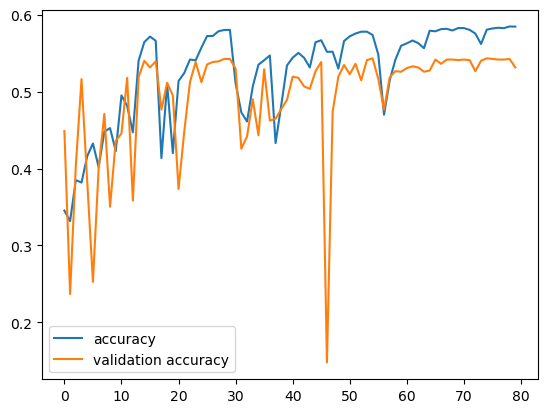

In [26]:
# plot the validation split to verify the model is not overfitting
history = neural_network_1.fit(
    X,
    y,
    verbose=0,
    validation_split=0.1,
    epochs=80,
    #batch_size=128
)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','validation accuracy'])

## Part 2: Neural Network with Deep Learning
### Five seasons of data from 2016 to 2021
### Three hidden layers with LeakyReLU activation and maximum nodes, one outer layer with linear activation, MSE as the loss activation, and a maximum of 130 epochs

In [27]:
# Read in the 2016-2021 dataframe from the `read_csv_files.ipynb` file
# Drop the 'Date' column from the dataframe
five_seasons_nn = df_combined_2016_2021.drop(
    columns=['Date']
)

# Display the dataframe
five_seasons_nn

,Home_Team,Away_Team,Over_Under,Spread,Moneyline_Home_Team,Moneyline_Away_Team,Game_Total_Points,Win_Margin
0,Cleveland Cavaliers,New York Knicks,205.5,9.5,-450.0,355.0,205.0,29.0
1,Portland Trail Blazers,Utah Jazz,194.0,6.0,-235.0,195.0,217.0,9.0
2,Golden State Warriors,San Antonio Spurs,210.5,8.0,-400.0,325.0,229.0,-29.0
3,Orlando Magic,Miami Heat,202.0,4.0,-155.0,135.0,204.0,-12.0
4,Indiana Pacers,Dallas Mavericks,207.5,5.0,-215.0,185.0,251.0,9.0
...,...,...,...,...,...,...,...,...
6242,Phoenix Suns,Milwaukee Bucks,221.0,5.5,-180.0,160.0,226.0,10.0
6243,Milwaukee Bucks,Phoenix Suns,222.0,3.5,-210.0,180.0,220.0,20.0
6244,Milwaukee Bucks,Phoenix Suns,220.5,3.5,-190.0,170.0,212.0,6.0
6245,Phoenix Suns,Milwaukee Bucks,218.5,4.0,-170.0,150.0,242.0,-4.0


In [28]:
# Review the data types
five_seasons_nn.dtypes

Home_Team               object
Away_Team               object
Over_Under             float64
Spread                 float64
Moneyline_Home_Team    float64
Moneyline_Away_Team    float64
Game_Total_Points      float64
Win_Margin             float64
dtype: object

In [29]:
# Create a list of the categorical variables
categorical_variables_2 = list(
    five_seasons_nn.dtypes[five_seasons_nn.dtypes == 'object'].index
)

# Display the list
categorical_variables_2

['Home_Team', 'Away_Team']

In [30]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(
    sparse = False
)

In [31]:
# Encode the categorical variables into numerical format
encoded_data_2 = enc.fit_transform(
    five_seasons_nn[categorical_variables_2]
)

In [32]:
# Create a dataframe with the encoded data
encoded_five_seasons_df = pd.DataFrame(
    encoded_data_2,
    columns = enc.get_feature_names_out(
        categorical_variables_2
    )
)

# Display the dataframe
encoded_five_seasons_df

,Home_Team_Atlanta Hawks,Home_Team_Boston Celtics,Home_Team_Brooklyn Nets,Home_Team_Charlotte Bobcats,Home_Team_Chicago Bulls,Home_Team_Cleveland Cavaliers,Home_Team_Dallas Mavericks,Home_Team_Denver Nuggets,Home_Team_Detroit Pistons,Home_Team_Golden State Warriors,...,Away_Team_Oklahoma City Thunder,Away_Team_Orlando Magic,Away_Team_Philadelphia 76ers,Away_Team_Phoenix Suns,Away_Team_Portland Trail Blazers,Away_Team_Sacramento Kings,Away_Team_San Antonio Spurs,Away_Team_Toronto Raptors,Away_Team_Utah Jazz,Away_Team_Washington Wizards
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# Create a new variable for the exisiting numerical data
numerical_variables_2 = five_seasons_nn.drop(
    columns = categorical_variables_2
)

# Display the dataframe
numerical_variables_2

,Over_Under,Spread,Moneyline_Home_Team,Moneyline_Away_Team,Game_Total_Points,Win_Margin
0,205.5,9.5,-450.0,355.0,205.0,29.0
1,194.0,6.0,-235.0,195.0,217.0,9.0
2,210.5,8.0,-400.0,325.0,229.0,-29.0
3,202.0,4.0,-155.0,135.0,204.0,-12.0
4,207.5,5.0,-215.0,185.0,251.0,9.0
...,...,...,...,...,...,...
6242,221.0,5.5,-180.0,160.0,226.0,10.0
6243,222.0,3.5,-210.0,180.0,220.0,20.0
6244,220.5,3.5,-190.0,170.0,212.0,6.0
6245,218.5,4.0,-170.0,150.0,242.0,-4.0


In [34]:
# Add the numerical data to the categorical encoded data dataframe
encoded_five_seasons_df = pd.concat(
    [encoded_five_seasons_df,
     numerical_variables_2],
    axis=1
)

# Display the dataframe
encoded_five_seasons_df

,Home_Team_Atlanta Hawks,Home_Team_Boston Celtics,Home_Team_Brooklyn Nets,Home_Team_Charlotte Bobcats,Home_Team_Chicago Bulls,Home_Team_Cleveland Cavaliers,Home_Team_Dallas Mavericks,Home_Team_Denver Nuggets,Home_Team_Detroit Pistons,Home_Team_Golden State Warriors,...,Away_Team_San Antonio Spurs,Away_Team_Toronto Raptors,Away_Team_Utah Jazz,Away_Team_Washington Wizards,Over_Under,Spread,Moneyline_Home_Team,Moneyline_Away_Team,Game_Total_Points,Win_Margin
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,205.5,9.5,-450.0,355.0,205.0,29.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,194.0,6.0,-235.0,195.0,217.0,9.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,210.5,8.0,-400.0,325.0,229.0,-29.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,202.0,4.0,-155.0,135.0,204.0,-12.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,207.5,5.0,-215.0,185.0,251.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,221.0,5.5,-180.0,160.0,226.0,10.0
6243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,222.0,3.5,-210.0,180.0,220.0,20.0
6244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,220.5,3.5,-190.0,170.0,212.0,6.0
6245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,218.5,4.0,-170.0,150.0,242.0,-4.0


In [35]:
# Add a "Signal" column which tracks the "Win_Margin" column
encoded_five_seasons_df['Win_Margin_Signal'] = 0.0

# When the "Win_Margin" is a greater than or equal to 0, set signal to 1
encoded_five_seasons_df.loc[(encoded_five_seasons_df['Win_Margin'] >= 0), 'Win_Margin_Signal'] = 1

# When the "Win_Margin" is less than 0, set signal to -1
encoded_five_seasons_df.loc[(encoded_five_seasons_df['Win_Margin'] < 0), 'Win_Margin_Signal'] = -1

# Display the dataframe
encoded_five_seasons_df

,Home_Team_Atlanta Hawks,Home_Team_Boston Celtics,Home_Team_Brooklyn Nets,Home_Team_Charlotte Bobcats,Home_Team_Chicago Bulls,Home_Team_Cleveland Cavaliers,Home_Team_Dallas Mavericks,Home_Team_Denver Nuggets,Home_Team_Detroit Pistons,Home_Team_Golden State Warriors,...,Away_Team_Toronto Raptors,Away_Team_Utah Jazz,Away_Team_Washington Wizards,Over_Under,Spread,Moneyline_Home_Team,Moneyline_Away_Team,Game_Total_Points,Win_Margin,Win_Margin_Signal
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,205.5,9.5,-450.0,355.0,205.0,29.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,194.0,6.0,-235.0,195.0,217.0,9.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,210.5,8.0,-400.0,325.0,229.0,-29.0,-1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,202.0,4.0,-155.0,135.0,204.0,-12.0,-1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,207.5,5.0,-215.0,185.0,251.0,9.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,221.0,5.5,-180.0,160.0,226.0,10.0,1.0
6243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,222.0,3.5,-210.0,180.0,220.0,20.0,1.0
6244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,220.5,3.5,-190.0,170.0,212.0,6.0,1.0
6245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,218.5,4.0,-170.0,150.0,242.0,-4.0,-1.0


In [36]:
# Change the 'Win_Margin_Signal' column to float data type
encoded_five_seasons_df['Win_Margin_Signal'] = encoded_five_seasons_df['Win_Margin_Signal'].astype(float)

# Verify that the data types are correct
encoded_five_seasons_df.dtypes

Home_Team_Atlanta Hawks        float64
Home_Team_Boston Celtics       float64
Home_Team_Brooklyn Nets        float64
Home_Team_Charlotte Bobcats    float64
Home_Team_Chicago Bulls        float64
                                ...   
Moneyline_Home_Team            float64
Moneyline_Away_Team            float64
Game_Total_Points              float64
Win_Margin                     float64
Win_Margin_Signal              float64
Length: 67, dtype: object

In [37]:
# Display the amount of each signal option
encoded_five_seasons_df['Win_Margin_Signal'].value_counts()

 1.0    3573
-1.0    2674
Name: Win_Margin_Signal, dtype: int64

In [38]:
# Set the y (target value) to 'Win_Margin_Signal' column
y = encoded_five_seasons_df['Win_Margin_Signal']

# Set the X (features) to all columns except 'Win_Margin_Signal'
X = encoded_five_seasons_df.drop(columns=['Win_Margin_Signal'])

# Display a sample of each dataframe
display(y[:5])
display(X.head())

0    1.0
1    1.0
2   -1.0
3   -1.0
4    1.0
Name: Win_Margin_Signal, dtype: float64

,Home_Team_Atlanta Hawks,Home_Team_Boston Celtics,Home_Team_Brooklyn Nets,Home_Team_Charlotte Bobcats,Home_Team_Chicago Bulls,Home_Team_Cleveland Cavaliers,Home_Team_Dallas Mavericks,Home_Team_Denver Nuggets,Home_Team_Detroit Pistons,Home_Team_Golden State Warriors,...,Away_Team_San Antonio Spurs,Away_Team_Toronto Raptors,Away_Team_Utah Jazz,Away_Team_Washington Wizards,Over_Under,Spread,Moneyline_Home_Team,Moneyline_Away_Team,Game_Total_Points,Win_Margin
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,205.5,9.5,-450.0,355.0,205.0,29.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,194.0,6.0,-235.0,195.0,217.0,9.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,210.5,8.0,-400.0,325.0,229.0,-29.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,202.0,4.0,-155.0,135.0,204.0,-12.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,207.5,5.0,-215.0,185.0,251.0,9.0


In [39]:
# Split the data into training and testing variables
X_train, X_test, y_train_2, y_test_2 = train_test_split(
    X,
    y,
    random_state=1
)

In [40]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled_2 = X_scaler.transform(X_train)
X_test_scaled_2 = X_scaler.transform(X_test)

In [41]:
# Define the number of inputs to the model
inputs_2 = len(X_train.iloc[0])

# Display the amount of inputs
print(f"The amount of inputs is {inputs_2}.")

# Define the first hidden layer
hidden_2_layer_1 = ((inputs_2 + 1) // 2) + 33

# Display the amount of nodes
print(f"The amount of nodes in the first hidden layer is {hidden_2_layer_1}.")

# Define the second hidden layer
hidden_2_layer_2 = ((hidden_2_layer_1 + 1) // 2) + 10

# Display the amount of nodes
print(f"The amount of nodes in the second hidden layer is {hidden_2_layer_2}.")

# Define the third hidden layer
hidden_2_layer_3 = ((hidden_2_layer_2 + 1) // 2)

# Display the amount of nodes
print(f"The amount of nodes in the third hidden layer is {hidden_2_layer_3}.")

The amount of inputs is 66.
The amount of nodes in the first hidden layer is 66.
The amount of nodes in the second hidden layer is 43.
The amount of nodes in the third hidden layer is 22.


In [42]:
# Create a Sequential mode instance
neural_network_2 = Sequential()

In [43]:
# Add the hidden layers
# First layer
neural_network_2.add(
    Dense(
        units=hidden_2_layer_1,
        input_dim=inputs_2,
        activation='LeakyReLU'
    )
)

# Second layer
neural_network_2.add(
    Dense(
        units=hidden_2_layer_2,
        activation='LeakyReLU'
    )
)

# Third layer
neural_network_2.add(
    Dense(
        units=hidden_2_layer_3,
        activation='LeakyReLU'
    )
)

# Add the output layer
neural_network_2.add(
    Dense(
        units=outputs,
        activation='linear'
    )
)

In [44]:
# Display the Sequential model summary
neural_network_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 66)                4422      
                                                                 
 dense_5 (Dense)             (None, 43)                2881      
                                                                 
 dense_6 (Dense)             (None, 22)                968       
                                                                 
 dense_7 (Dense)             (None, 1)                 23        
                                                                 
Total params: 8,294
Trainable params: 8,294
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Compile the Sequential model
neural_network_2.compile(
    loss="mse",
    optimizer="adam", 
    metrics=["accuracy"]
)

In [46]:
# Fit the model using 130 epochs
fit_model = neural_network_2.fit(
    X_train_scaled_2,
    y_train_2,
    epochs=130,
    validation_split=0.1,
    callbacks=[early_stopping]
)

Epoch 1/130
132/132 [==============================] - 3s 8ms/step - loss: 0.7817 - accuracy: 0.1962 - val_loss: 0.4783 - val_accuracy: 0.2878
Epoch 2/130
132/132 [==============================] - 1s 8ms/step - loss: 0.3761 - accuracy: 0.3641 - val_loss: 0.4016 - val_accuracy: 0.3518
Epoch 3/130
132/132 [==============================] - 1s 10ms/step - loss: 0.3198 - accuracy: 0.3909 - val_loss: 0.3714 - val_accuracy: 0.3177
Epoch 4/130
132/132 [==============================] - 1s 8ms/step - loss: 0.2869 - accuracy: 0.4075 - val_loss: 0.3535 - val_accuracy: 0.3646
Epoch 5/130
132/132 [==============================] - 1s 7ms/step - loss: 0.2544 - accuracy: 0.4355 - val_loss: 0.3132 - val_accuracy: 0.3945
Epoch 6/130
132/132 [==============================] - 1s 6ms/step - loss: 0.2174 - accuracy: 0.4590 - val_loss: 0.2793 - val_accuracy: 0.4414
Epoch 7/130
132/132 [==============================] - 1s 5ms/step - loss: 0.1748 - accuracy: 0.4870 - val_loss: 0.2222 - val_accuracy: 0.443

In [47]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = neural_network_2.evaluate(
    X_test_scaled_2,
    y_test_2, 
    verbose=2
)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

49/49 - 0s - loss: 0.0266 - accuracy: 0.5563 - 171ms/epoch - 3ms/step
Loss: 0.02664453163743019, Accuracy: 0.5563380122184753


## Report for Part 2:
We have achieved about 55% accuracy with only the five most recent seasons of data. This is very interesting. We had originally though that the more recent five seasons would have a better outcome as sports teams can change year-to-year. Either way, 55-57% accuracy is very good. We will now move on with the testing this data with four hidden layers instead of only three.

In [48]:
# Make predictions for 5 season 3 hidden layers
predictions_five_seasons_1 = (neural_network_2.predict(X_test_scaled_2) > 0.5).astype("int32")

# Create a DataFrame to compare the predictions with the actual values
results_five_seasons_1 = pd.DataFrame({"predictions": predictions_five_seasons_1.ravel(), "actual": y_test_2})

# Display sample data
print(f"All predicted 1's should be actual 1.0's and all predicted 0's should be actual -1.0's")
display(results_five_seasons_1.sample(10))

49/49 [==============================] - 0s 4ms/step
All predicted 1's should be actual 1.0's and all predicted 0's should be actual -1.0's


,predictions,actual
717,1,1.0
101,0,1.0
3756,1,1.0
5878,0,-1.0
4705,1,1.0
3052,0,-1.0
4574,1,1.0
2852,1,1.0
1470,0,-1.0
2285,1,1.0


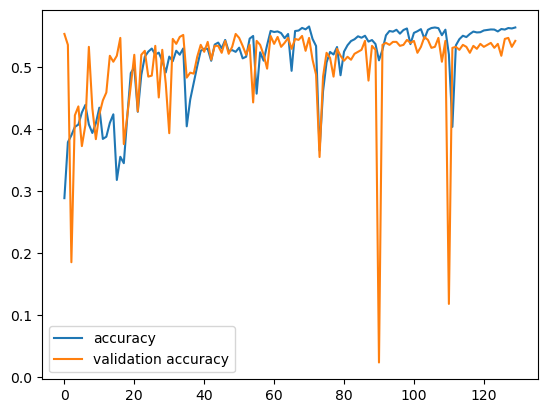

In [49]:
# plot the validation split to verify the model is not overfitting
history = neural_network_2.fit(
    X,
    y,
    verbose=0,
    validation_split=0.1,
    epochs=130,
    #batch_size=128
)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','validation accuracy'])

## Part 3: Neural Network with Deep Learning 
### 10 seasons of data from 2011 to 2021
### Four hidden layers with LeakyReLU activation and maximum nodes, one outer layer with linear activation, MSE as the loss activation, and a maximum of 100 epochs

In [50]:
# Display the dataframe, reuse the encoded data with ten seasons
display(encoded_ten_seasons_df)

# Display the amount of each signal option
display(encoded_ten_seasons_df['Win_Margin_Signal'].value_counts())

,Home_Team_Atlanta Hawks,Home_Team_Boston Celtics,Home_Team_Brooklyn Nets,Home_Team_Charlotte Bobcats,Home_Team_Chicago Bulls,Home_Team_Cleveland Cavaliers,Home_Team_Dallas Mavericks,Home_Team_Denver Nuggets,Home_Team_Detroit Pistons,Home_Team_Golden State Warriors,...,Away_Team_Toronto Raptors,Away_Team_Utah Jazz,Away_Team_Washington Wizards,Over_Under,Spread,Moneyline_Home_Team,Moneyline_Away_Team,Game_Total_Points,Win_Margin,Win_Margin_Signal
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,195.5,5.0,-210.0,185.0,210.0,2.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,190.5,3.5,185.0,-210.0,199.0,-11.0,-1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,186.0,1.5,205.0,-245.0,175.0,-1.0,-1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,197.0,7.5,-380.0,310.0,186.0,8.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,212.0,4.0,175.0,-200.0,191.0,-19.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,221.0,5.5,-180.0,160.0,226.0,10.0,1.0
12577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,222.0,3.5,-210.0,180.0,220.0,20.0,1.0
12578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,220.5,3.5,-190.0,170.0,212.0,6.0,1.0
12579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,218.5,4.0,-170.0,150.0,242.0,-4.0,-1.0


 1.0    7318
-1.0    5263
Name: Win_Margin_Signal, dtype: int64

In [51]:
# Set the y (target value) to 'Win_Margin_Signal' column
y = encoded_ten_seasons_df['Win_Margin_Signal']

# Set the X (features) to all columns except 'Win_Margin_Signal'
X = encoded_ten_seasons_df.drop(columns=['Win_Margin_Signal'])

# Display a sample of each
display(y[:5])
display(X.head())

0    1.0
1   -1.0
2   -1.0
3    1.0
4   -1.0
Name: Win_Margin_Signal, dtype: float64

,Home_Team_Atlanta Hawks,Home_Team_Boston Celtics,Home_Team_Brooklyn Nets,Home_Team_Charlotte Bobcats,Home_Team_Chicago Bulls,Home_Team_Cleveland Cavaliers,Home_Team_Dallas Mavericks,Home_Team_Denver Nuggets,Home_Team_Detroit Pistons,Home_Team_Golden State Warriors,...,Away_Team_San Antonio Spurs,Away_Team_Toronto Raptors,Away_Team_Utah Jazz,Away_Team_Washington Wizards,Over_Under,Spread,Moneyline_Home_Team,Moneyline_Away_Team,Game_Total_Points,Win_Margin
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,195.5,5.0,-210.0,185.0,210.0,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,190.5,3.5,185.0,-210.0,199.0,-11.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,186.0,1.5,205.0,-245.0,175.0,-1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,197.0,7.5,-380.0,310.0,186.0,8.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,212.0,4.0,175.0,-200.0,191.0,-19.0


In [52]:
# Split the data into training and testing variables
X_train, X_test, y_train_3, y_test_3 = train_test_split(
    X,
    y,
    random_state=1
)

In [53]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled_3 = X_scaler.transform(X_train)
X_test_scaled_3 = X_scaler.transform(X_test)

In [54]:
# Display the amount of inputs
print(f"The amount of inputs is {inputs_1}.")

# Define the first hidden layer
hidden_3_layer_1 = ((inputs_1) // 2) + 23

# Display the amount of nodes
print(f"The amount of nodes in the first hidden layer is {hidden_3_layer_1}.")

# Define the second hidden layer
hidden_3_layer_2 = ((hidden_3_layer_1) // 2) + 11

# Display the amount of nodes
print(f"The amount of nodes in the second hidden layer is {hidden_3_layer_2}.")

# Define the third hidden layer
hidden_3_layer_3 = ((hidden_3_layer_2 + 1) // 2) + 4

# Display the amount of nodes
print(f"The amount of nodes in the third hidden layer is {hidden_3_layer_3}.")

# Define the fourth hidden layer
hidden_3_layer_4 = ((hidden_3_layer_3 + 1) // 2)

# Display the amount of nodes
print(f"The amount of nodes in the fourth hidden layer is {hidden_3_layer_4}.")

The amount of inputs is 68.
The amount of nodes in the first hidden layer is 57.
The amount of nodes in the second hidden layer is 39.
The amount of nodes in the third hidden layer is 24.
The amount of nodes in the fourth hidden layer is 12.


In [55]:
# Create a Sequential model instance
neural_network_3 = Sequential()

In [56]:
# Add the hidden layers
# First layer
neural_network_3.add(
    Dense(
        units=hidden_3_layer_1,
        input_dim=inputs_1,
        activation='LeakyReLU'
    )
)

# Second layer
neural_network_3.add(
    Dense(
        units=hidden_3_layer_2,
        activation='LeakyReLU'
    )
)

# Third layer
neural_network_3.add(
    Dense(
        units=hidden_3_layer_3,
        activation='LeakyReLU'
    )
)

# Fourth layer
neural_network_3.add(
    Dense(
        units=hidden_3_layer_4,
        activation='LeakyReLU'
    )
)

# Add the output layer
neural_network_3.add(
    Dense(
        units=outputs,
        activation='linear'
    )
)

In [57]:
# Display the Sequential model summary
neural_network_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 57)                3933      
                                                                 
 dense_9 (Dense)             (None, 39)                2262      
                                                                 
 dense_10 (Dense)            (None, 24)                960       
                                                                 
 dense_11 (Dense)            (None, 12)                300       
                                                                 
 dense_12 (Dense)            (None, 1)                 13        
                                                                 
Total params: 7,468
Trainable params: 7,468
Non-trainable params: 0
_________________________________________________________________


In [58]:
# Compile the Sequential model
neural_network_3.compile(
    loss="mse",
    optimizer="adam", 
    metrics=["accuracy"]
)

In [59]:
# Fit the model using 100 epochs
fit_model = neural_network_3.fit(
    X_train_scaled_3,
    y_train_3,
    epochs=100,
    validation_split=0.1,
    callbacks=[early_stopping]
)

Epoch 1/100
266/266 [==============================] - 4s 7ms/step - loss: 0.5845 - accuracy: 0.2888 - val_loss: 0.3335 - val_accuracy: 0.3941
Epoch 2/100
266/266 [==============================] - 2s 6ms/step - loss: 0.2591 - accuracy: 0.4485 - val_loss: 0.1970 - val_accuracy: 0.4449
Epoch 3/100
266/266 [==============================] - 2s 6ms/step - loss: 0.1120 - accuracy: 0.5295 - val_loss: 0.0992 - val_accuracy: 0.5127
Epoch 4/100
266/266 [==============================] - 2s 6ms/step - loss: 0.0619 - accuracy: 0.5605 - val_loss: 0.0728 - val_accuracy: 0.5424
Epoch 5/100
266/266 [==============================] - 2s 6ms/step - loss: 0.0423 - accuracy: 0.5677 - val_loss: 0.0555 - val_accuracy: 0.5371
Epoch 6/100
266/266 [==============================] - 1s 5ms/step - loss: 0.0263 - accuracy: 0.5739 - val_loss: 0.0469 - val_accuracy: 0.5424
Epoch 7/100
266/266 [==============================] - 1s 6ms/step - loss: 0.0182 - accuracy: 0.5776 - val_loss: 0.0410 - val_accuracy: 0.5498

In [60]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = neural_network_3.evaluate(
    X_test_scaled_3,
    y_test_3, 
    verbose=2
)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

99/99 - 0s - loss: 0.0164 - accuracy: 0.5731 - 377ms/epoch - 4ms/step
Loss: 0.01637442596256733, Accuracy: 0.5731087327003479


## Report for Part 3:
We have achieved about 57% accuracy. This is nearly the same result that we got when we tested the same 10 seasons with only three hidden layers. We do see a bit less loss in this model, though, which is a desirable difference. We will now move on to test the more recent five seasons of data with four hidden layers.

In [61]:
# Make predictions for 10 season 
predictions_ten_seasons_2 = (neural_network_3.predict(X_test_scaled_3) > 0.5).astype("int32")

# Create a DataFrame to compare the predictions with the actual values
results_ten_seasons_2 = pd.DataFrame({"predictions": predictions_ten_seasons_2.ravel(), "actual": y_test_3})

# Display sample data
print(f"All predicted 1's should be actual 1.0's and all predicted 0's should be actual -1.0's")
display(results_ten_seasons_2.sample(10))

99/99 [==============================] - 1s 4ms/step
All predicted 1's should be actual 1.0's and all predicted 0's should be actual -1.0's


,predictions,actual
4908,0,-1.0
11464,1,1.0
4371,0,-1.0
3448,0,-1.0
6003,0,-1.0
4287,1,1.0
5436,0,-1.0
10552,0,-1.0
11099,1,1.0
6646,1,1.0


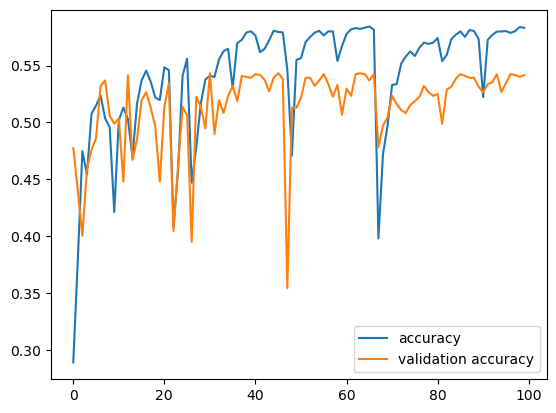

In [62]:
# plot the validation split to verify the model is not overfitting
history = neural_network_3.fit(
    X,
    y,
    verbose=0,
    validation_split=0.1,
    epochs=100,
    #batch_size=128
)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','validation accuracy'])

## Part 4: Neural Network with Deep Learning 
### Five seasons of data from 2016 to 2021
### Four hidden layers with LeakyReLU activation and maximum nodes, one outer layer with linear activation, MSE as the loss activation, and a maximum of 60 epochs

In [63]:
# Display the dataframe, reuse the encoded data with five seasons
display(encoded_five_seasons_df)

# Display the amount of each signal option
display(encoded_five_seasons_df['Win_Margin_Signal'].value_counts())

,Home_Team_Atlanta Hawks,Home_Team_Boston Celtics,Home_Team_Brooklyn Nets,Home_Team_Charlotte Bobcats,Home_Team_Chicago Bulls,Home_Team_Cleveland Cavaliers,Home_Team_Dallas Mavericks,Home_Team_Denver Nuggets,Home_Team_Detroit Pistons,Home_Team_Golden State Warriors,...,Away_Team_Toronto Raptors,Away_Team_Utah Jazz,Away_Team_Washington Wizards,Over_Under,Spread,Moneyline_Home_Team,Moneyline_Away_Team,Game_Total_Points,Win_Margin,Win_Margin_Signal
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,205.5,9.5,-450.0,355.0,205.0,29.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,194.0,6.0,-235.0,195.0,217.0,9.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,210.5,8.0,-400.0,325.0,229.0,-29.0,-1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,202.0,4.0,-155.0,135.0,204.0,-12.0,-1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,207.5,5.0,-215.0,185.0,251.0,9.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,221.0,5.5,-180.0,160.0,226.0,10.0,1.0
6243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,222.0,3.5,-210.0,180.0,220.0,20.0,1.0
6244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,220.5,3.5,-190.0,170.0,212.0,6.0,1.0
6245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,218.5,4.0,-170.0,150.0,242.0,-4.0,-1.0


 1.0    3573
-1.0    2674
Name: Win_Margin_Signal, dtype: int64

In [64]:
# Set the y (target value) to 'Win_Margin_Signal' column
y = encoded_five_seasons_df['Win_Margin_Signal']

# Set the X (features) to all columns except 'Win_Margin_Signal'
X = encoded_five_seasons_df.drop(columns=['Win_Margin_Signal'])

# Display a sample of each
display(y[:5])
display(X.head())

0    1.0
1    1.0
2   -1.0
3   -1.0
4    1.0
Name: Win_Margin_Signal, dtype: float64

,Home_Team_Atlanta Hawks,Home_Team_Boston Celtics,Home_Team_Brooklyn Nets,Home_Team_Charlotte Bobcats,Home_Team_Chicago Bulls,Home_Team_Cleveland Cavaliers,Home_Team_Dallas Mavericks,Home_Team_Denver Nuggets,Home_Team_Detroit Pistons,Home_Team_Golden State Warriors,...,Away_Team_San Antonio Spurs,Away_Team_Toronto Raptors,Away_Team_Utah Jazz,Away_Team_Washington Wizards,Over_Under,Spread,Moneyline_Home_Team,Moneyline_Away_Team,Game_Total_Points,Win_Margin
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,205.5,9.5,-450.0,355.0,205.0,29.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,194.0,6.0,-235.0,195.0,217.0,9.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,210.5,8.0,-400.0,325.0,229.0,-29.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,202.0,4.0,-155.0,135.0,204.0,-12.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,207.5,5.0,-215.0,185.0,251.0,9.0


In [65]:
# Split the data into training and testing variables
X_train, X_test, y_train_4, y_test_4 = train_test_split(
    X,
    y,
    random_state=1
)

In [66]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled_4 = X_scaler.transform(X_train)
X_test_scaled_4 = X_scaler.transform(X_test)

In [67]:
# Display the amount of inputs
print(f"The amount of inputs is {inputs_2}.")

# Define the first hidden layer
hidden_4_layer_1 = ((inputs_2) // 2) + 23

# Display the amount of nodes
print(f"The amount of nodes in the first hidden layer is {hidden_4_layer_1}.")

# Define the second hidden layer
hidden_4_layer_2 = ((hidden_4_layer_1) // 2) + 11

# Display the amount of nodes
print(f"The amount of nodes in the second hidden layer is {hidden_4_layer_2}.")

# Define the third hidden layer
hidden_4_layer_3 = ((hidden_4_layer_2 + 1) // 2) + 4

# Display the amount of nodes
print(f"The amount of nodes in the third hidden layer is {hidden_4_layer_3}.")

# Define the fourth hidden layer
hidden_4_layer_4 = ((hidden_4_layer_3 + 1) // 2)

# Display the amount of nodes
print(f"The amount of nodes in the fourth hidden layer is {hidden_4_layer_4}.")

The amount of inputs is 66.
The amount of nodes in the first hidden layer is 56.
The amount of nodes in the second hidden layer is 39.
The amount of nodes in the third hidden layer is 24.
The amount of nodes in the fourth hidden layer is 12.


In [68]:
# Create a Sequential model instance
neural_network_4 = Sequential()

In [69]:
# Add the hidden layers
# First layer
neural_network_4.add(
    Dense(
        units=hidden_4_layer_1,
        input_dim=inputs_2,
        activation='LeakyReLU'
    )
)

# Second layer
neural_network_4.add(
    Dense(
        units=hidden_4_layer_2,
        activation='LeakyReLU'
    )
)

# Third layer
neural_network_4.add(
    Dense(
        units=hidden_4_layer_3,
        activation='LeakyReLU'
    )
)

# Fourth layer
neural_network_4.add(
    Dense(
        units=hidden_4_layer_4,
        activation='LeakyReLU'
    )
)

# Add the output layer
neural_network_4.add(
    Dense(
        units=outputs,
        activation='linear'
    )
)

In [70]:
# Display the Sequential model summary
neural_network_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 56)                3752      
                                                                 
 dense_14 (Dense)            (None, 39)                2223      
                                                                 
 dense_15 (Dense)            (None, 24)                960       
                                                                 
 dense_16 (Dense)            (None, 12)                300       
                                                                 
 dense_17 (Dense)            (None, 1)                 13        
                                                                 
Total params: 7,248
Trainable params: 7,248
Non-trainable params: 0
_________________________________________________________________


In [71]:
# Compile the Sequential model
neural_network_4.compile(
    loss="mse",
    optimizer="adam", 
    metrics=["accuracy"]
)

In [72]:
# Fit the model using 60 epochs
fit_model = neural_network_4.fit(
    X_train_scaled_4,
    y_train_4,
    epochs=60,
    validation_split=0.1,
    callbacks=[early_stopping]
)

Epoch 1/60
132/132 [==============================] - 4s 12ms/step - loss: 0.6860 - accuracy: 0.2177 - val_loss: 0.3931 - val_accuracy: 0.3134
Epoch 2/60
132/132 [==============================] - 1s 9ms/step - loss: 0.3106 - accuracy: 0.4073 - val_loss: 0.3074 - val_accuracy: 0.3753
Epoch 3/60
132/132 [==============================] - 1s 8ms/step - loss: 0.2373 - accuracy: 0.4511 - val_loss: 0.2572 - val_accuracy: 0.4264
Epoch 4/60
132/132 [==============================] - 1s 7ms/step - loss: 0.1741 - accuracy: 0.4900 - val_loss: 0.1927 - val_accuracy: 0.4243
Epoch 5/60
132/132 [==============================] - 1s 8ms/step - loss: 0.1025 - accuracy: 0.5270 - val_loss: 0.1414 - val_accuracy: 0.4755
Epoch 6/60
132/132 [==============================] - 1s 8ms/step - loss: 0.0640 - accuracy: 0.5484 - val_loss: 0.1028 - val_accuracy: 0.4861
Epoch 7/60
132/132 [==============================] - 1s 10ms/step - loss: 0.0463 - accuracy: 0.5569 - val_loss: 0.0907 - val_accuracy: 0.5032
Epoc

In [73]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = neural_network_4.evaluate(
    X_test_scaled_4,
    y_test_4, 
    verbose=2
)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

49/49 - 0s - loss: 0.0540 - accuracy: 0.5531 - 180ms/epoch - 4ms/step
Loss: 0.05402780696749687, Accuracy: 0.5531370043754578


## Report for Part 4:
We have achieved about 55% accuracy. This is nearly the same result that we got when we tested the same five seasons with only three hidden layers. We also see about the same loss in this model, which is a difference from the 10-season testing where we saw a decrease in loss when a fourth hidden layer was added.

In [74]:
# Make predictions for 10 season 
predictions_five_seasons_2 = (neural_network_4.predict(X_test_scaled_4) > 0.5).astype("int32")

# Create a DataFrame to compare the predictions with the actual values
results_five_seasons_2 = pd.DataFrame({"predictions": predictions_five_seasons_2.ravel(), "actual": y_test_4})

# Display sample data
print(f"All predicted 1's should be actual 1.0's and all predicted 0's should be actual -1.0's")
display(results_five_seasons_2.sample(10))

49/49 [==============================] - 1s 12ms/step
All predicted 1's should be actual 1.0's and all predicted 0's should be actual -1.0's


,predictions,actual
4314,1,1.0
2618,1,1.0
1117,0,-1.0
5009,0,-1.0
5563,1,1.0
4799,0,-1.0
1734,1,1.0
4919,0,-1.0
2611,1,1.0
1179,0,-1.0


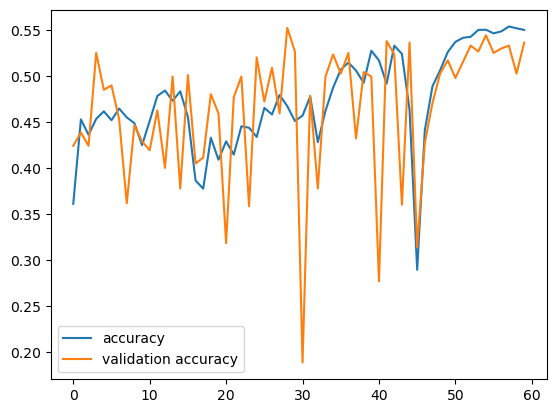

In [75]:
# plot the validation split to verify the model is not overfitting
history = neural_network_4.fit(
    X,
    y,
    verbose=0,
    validation_split=0.1,
    epochs=60,
    #batch_size=128
)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','validation accuracy'])

# The best model we created was model "neural_network_3" which used four hidden layers with maximum nodes, LeakyReLU activation, one output layer with linear activation, and 100 epochs. We will now use this model to predict outcomes for the 2021-2022 NBA Season and compare them with the actual outcomes of that season.